In [29]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations_with_replacement
warnings.filterwarnings('ignore')

In [31]:
class Regression(object):
    """
    Base regression model that creates a relationship between x and y variables
    
    parameters:
    -----------------
    n_iter = number of iterations over which the weights of the model would be tuned
    learning_rate = rate by which by weights are adjusted in each iteration
    """
    
    def __init__(self, n_iter, learning_rate):
        self.n_iter = n_iter
        self.learning_rate = learning_rate
        
    def init_weights(self, n_features):
        limit = 1 / np.sqrt(n_features)
        self.w = np.random.uniform(-limit, limit,(n_features,))
        
    def fit(self, X, Y):
        #Adding a bias weght column
        X = np.insert(X,0,1,axis=1)
        #for every iteration lets track error
        self.training_errors = []
        #initialize the weight vector
        self.init_weights(X.shape[1])
        
        #performning gradient descent
        
        for i in range(self.n_iter):
            #prediction
            y_pred = X.dot(self.w)
            
            #compute l1 loss
            me =  np.mean(0.5 *(Y-y_pred)**2)
            
            self.training_errors.append(me)
            
            #Gradient of loss w.r.t weights
            self.grad_w = (1/X.shape[0]) * X.T.dot(y_pred - Y)

            #update the weight
            self.w = self.w - self.learning_rate * self.grad_w
        
    def predict(self,X):
      X = np.insert(X,0,1,axis=1)
      y_pred = X.dot(self.w)
      return y_pred
    

In [44]:
def polynomial_features(degree,X):
  """
  Function to generate polynomial features upto a certain degree degree

  """
  n_features = X.shape[1]
  n_samples = X.shape[0]

  def make_combinations():
    comb = [combinations_with_replacement(range(0,n_features),i) for i in range(0,degree+1)]
    flat_comb = [item for sublist in comb for item in sublist]
    return flat_comb
  
  combs = make_combinations()
  n_new_features = len(combs)
  X_new = np.empty((n_samples,n_new_features))

  for i, index_combs in enumerate(combs):  
        X_new[:, i] = np.prod(X[:, index_combs], axis=1)

  return X_new

In [40]:
class Polynomial_Regression(Regression):
    """
    Performs a non-linear transformation of the data before fitting the model
    and doing predictions which allows for doing non-linear regression.
    Parameters:
    -----------
    degree: int
        The degree of the polynomial that the independent variable X will be transformed to.
    n_iterations: float
        The number of training iterations the algorithm will tune the weights for.
    learning_rate: float
        The step length that will be used when updating the weights.
    """

    def __init__(self ,degree , n_iter, learning_rate):
      self.degree = degree
      super(Polynomial_Regression,self).__init__(n_iter=n_iter,
                                                learning_rate=learning_rate)
      
    def fit(self, X, Y):
      X_new = polynomial_features(self.degree,X)

      super(Polynomial_Regression,self).fit(X_new,Y)

Text(0.5, 1.0, 'X2')

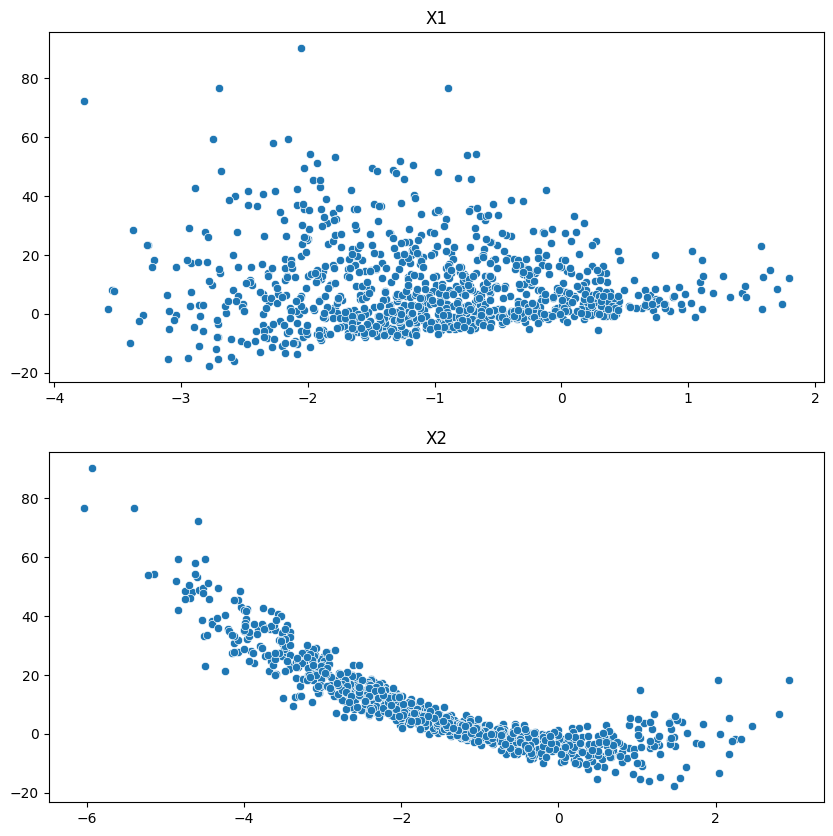

In [38]:
#simulating random data for the regression
X1 = np.random.normal(-1,1,1000)
X2 = np.random.normal(-1.5,1.5,1000)
X = np.stack([X1,X2],axis=1)
Y =   2 + 3 * X1 + 1.8 * X2**2 + 2.5 * X2 * X1 +  np.random.normal(-2.75,1.75,1000)
fig, axes = plt.subplots(2,1,figsize=(10,10))

sns.scatterplot(x=X1,y=Y,ax=axes[0])
axes[0].set_title("X1")

sns.scatterplot(x=X2,y=Y,ax=axes[1])
axes[1].set_title("X2")

In [45]:
reg = Polynomial_Regression(degree = 2,n_iter = 100, learning_rate = 0.01)
reg.fit(X,Y)

In [47]:
reg.w

array([-0.6010482 , -0.82070836,  0.66404069, -0.4252531 , -0.67604226,
        2.06969819,  1.77531769])

Text(0.5, 1.0, 'training error')

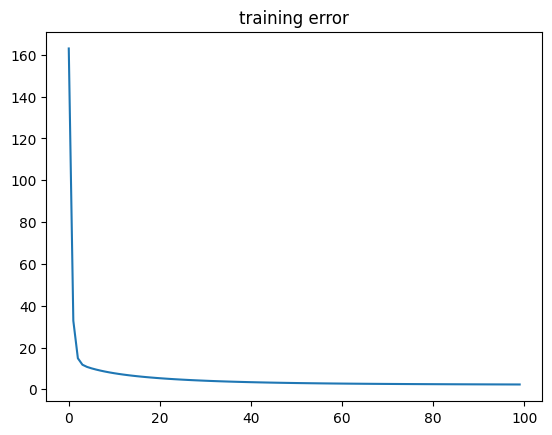

In [46]:
sns.lineplot(x = range(len(reg.training_errors)),y = reg.training_errors)
plt.title('training error')